# Example: Generating compounds for different targets

First you need to set up PCMol via the installation script (setup.sh) and set ***pcmol*** conda environment as the kernel of choice.

## Loading the model

In [3]:
from pcmol.models.runner import Runner
pcmol = Runner(model_id='XL', checkpoint=7, inference=True)

Loading model from /home/andrius/pcmol/data/models/XL
Loading config from /home/andrius/pcmol/data/models/XL/config.yaml
Loaded model XL, parameter count: 101340995               
Model directory: /home/andrius/pcmol/data/models/XL20241106-161843, checkpoint: 7


## Generating compounds for individual targets

In [52]:
protein_id = 'Q99685'
generated_df = pcmol.targetted_generation(protein_id=protein_id, batch_size=2, repeat=10, verbose=False)
generated_df.head()

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 15/15 [00:00<00:00, 774.49it/s]

    Evaluating 20 SMILES strings...


,target,train,valid,logP,MW,HBA,HBD,qed,tpsa,rotatable_bonds,aromatic_rings,num_rings,heavy_atoms
Cc1nn(C)c(C)c1-c1cccc(N2CCC(N3CC(c4ccc([N+](=O)[O-])cc4)C(c4ccc5c(c4)OCO5)C3=O)C2)c1,Q99685,1,True,5.32934,579.248169,8,0,None,102.97,6,4,7,43
O=C1NC2(CO1)CC(C(=O)N1CCC(OCc3ccccc3)CC1)C2,Q99685,1,True,2.08280,344.173607,4,1,None,67.87,4,1,4,25
Cc1cc(C)c(C(=O)N2CCC(C(c3ccc4c(c3)OCO4)c3ccc4c(c3)OCO4)CC2)c(=O)[nH]1,Q99685,1,True,4.13344,488.194737,6,1,None,90.09,4,3,6,36
Cc1cc(O)cc(C(=O)N2CCC(OCc3cccc(Oc4ccc(F)cc4)c3)CC2)c1,Q99685,1,True,5.45342,435.184587,4,1,None,59.00,6,3,4,32
Cc1ccc(C)c(C[N+](C)(C)C(C)C)c1,Q99685,1,True,3.28824,206.190326,0,0,None,0.00,3,1,1,15


## Define a simple function for visualizing the generated molecules

In [41]:
from chemFilters.img_render import MolGridPlotter
plotter = MolGridPlotter(from_smi=True, size=(100,100))

def generate_and_visualize(protein_id, batch_size=2, repeat=10):
    generated_df = pcmol.targetted_generation(protein_id=protein_id, batch_size=batch_size, repeat=repeat, verbose=False)
    filtered = generated_df[generated_df.valid==True].index.tolist()
    return plotter.mol_grid_png(filtered, n_cols=5)

Loading AlphaFold2 <structure> embeddings...


  0%|          | 0/13 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 742.36it/s]


    Evaluating 20 SMILES strings...


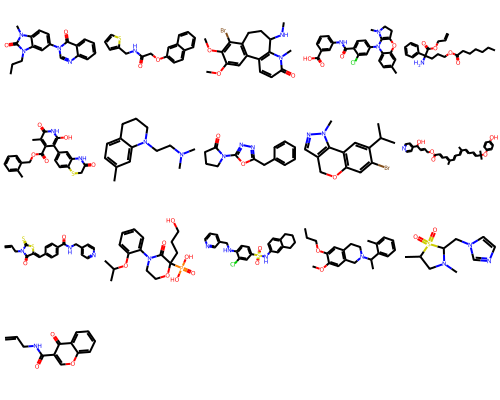

In [42]:
generate_and_visualize(protein_id='P10632')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 13/13 [00:00<00:00, 758.83it/s]


    Evaluating 20 SMILES strings...


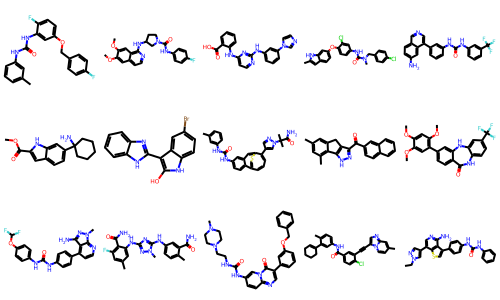

In [43]:
generate_and_visualize(protein_id='P17948')

Loading AlphaFold2 <structure> embeddings...


  0%|          | 0/13 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 844.66it/s]


    Evaluating 20 SMILES strings...


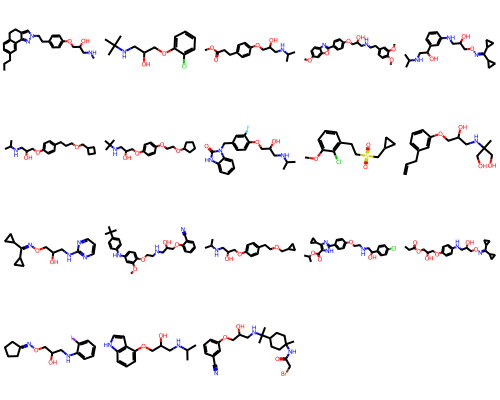

In [44]:
generate_and_visualize(protein_id='P18090')

Loading AlphaFold2 <structure> embeddings...


  0%|          | 0/13 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 885.92it/s]


    Evaluating 20 SMILES strings...


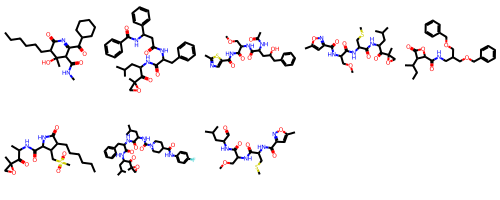

In [45]:
generate_and_visualize(protein_id='P25043')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 13/13 [00:00<00:00, 853.22it/s]


    Evaluating 20 SMILES strings...


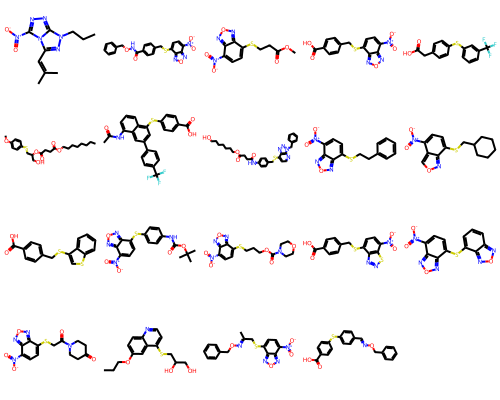

In [46]:
generate_and_visualize(protein_id='P28161')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 13/13 [00:00<00:00, 805.93it/s]

    Evaluating 20 SMILES strings...


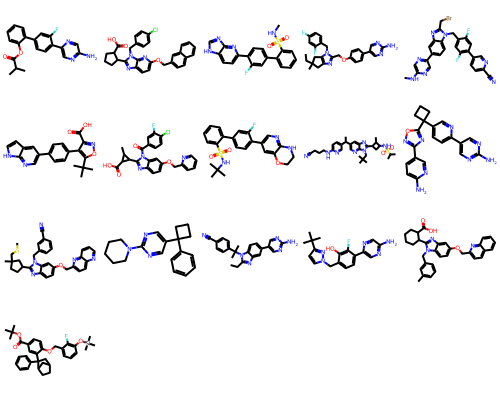

In [47]:
generate_and_visualize(protein_id='P30355')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 13/13 [00:00<00:00, 884.62it/s]

    Evaluating 20 SMILES strings...


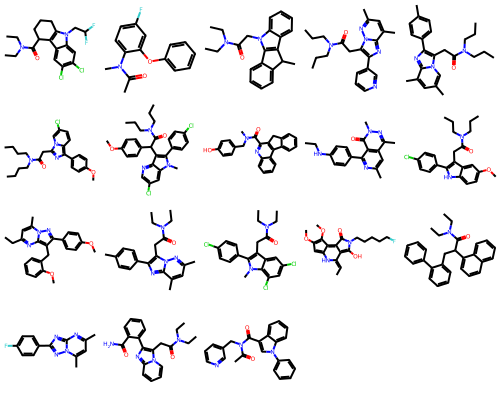

In [48]:
generate_and_visualize(protein_id='P30536')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 13/13 [00:00<00:00, 764.20it/s]

    Evaluating 20 SMILES strings...


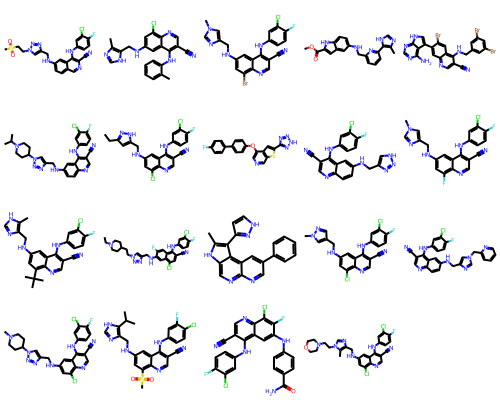

In [49]:
generate_and_visualize(protein_id='P41279')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 15/15 [00:00<00:00, 835.63it/s]


    Evaluating 20 SMILES strings...


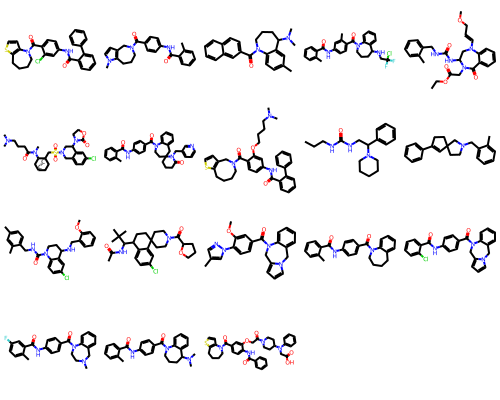

In [51]:
generate_and_visualize(protein_id='P48044')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 17/17 [00:00<00:00, 875.37it/s]


    Evaluating 20 SMILES strings...


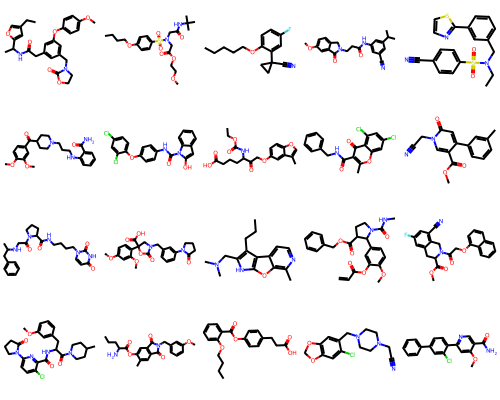

In [54]:
generate_and_visualize(protein_id='P63279')

Loading AlphaFold2 <structure> embeddings...


100%|██████████| 18/18 [00:00<00:00, 862.99it/s]


    Evaluating 20 SMILES strings...


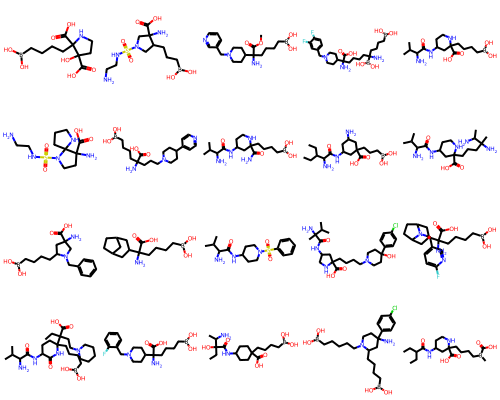

In [55]:
generate_and_visualize(protein_id='P78540')